In [153]:
!pip install folktables
!pip install matplotlib seaborn



In [187]:
import pandas as pd

# Define the file path
file_path = r"adult_reconstruction.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   hours-per-week  age  capital-gain  capital-loss workclass     education  \
0              20   40             0             0   Private     Bachelors   
1              40   21             0             0   Private  Some-college   
2              10   17             0             0   Private          11th   
3              50   51             0             0   Private       HS-grad   
4              38   28             0             0   Private     Bachelors   

   education-num      marital-status   relationship                race  \
0             13  Married-civ-spouse           Wife               White   
1             10            Divorced      Own-child               White   
2              7       Never-married      Own-child               White   
3              9  Married-civ-spouse        Husband  Asian-Pac-Islander   
4             13       Never-married  Not-in-family               White   

   gender native-country  income       occupation  
0  Female  United-States   4

In [188]:
for column in df.columns:
    print(f"\n--- {column} ---")
    print(df[column].unique())



--- hours-per-week ---
[20 40 10 50 38 99 24 45 42 30 32 60 35 52 37 36 70 12 55 15 17 80 43 65
 39  4 49 48 18 28 22 56 25 44 68  8  5 14  2 16 64 75 87 47 33 90 84 46
 13  7 19 51 41 59 21 57 27 98 54 11 34 66  6 92  3 72 58 62  9  1 26 53
 78 23 67 85 61 63 31 29 73 77 97 76 96 81 88 94 91 95 74 86 89 79 69 82]

--- age ---
[40 21 17 51 28 26 44 81 45 37 24 29 33 23 59 56 41 38 35 34 43 22 30 27
 50 48 25 46 32 62 20 53 52 39 47 18 68 57 42 36 64 19 49 54 31 61 78 70
 58 87 55 73 75 65 63 60 66 72 71 69 77 90 67 76 74 83 80 79 85 84 82 89
 88 86]

--- capital-gain ---
[    0  2354 15024 14084  7688  4064  7298  1055  4386  2176  3781  3103
  5178   594  3137  3464  6418  2885  2653  5013  3411  2597 10566  2964
  2174  4865  4787  4650 25236  3908  9386  3456  2346  6849  6767  3674
  2202  8614  1506  2907  2463  2290 99999  2635  6360  1424 20051 15020
 10520  3325  3818   114  1471 14344 27828  2829  4508  5721  2228  2329
  1639  2050 13550  4101  4416  4934  1797  6497  1086  

## Data Preprocessing

### Dropping missing values ('?')

In [189]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df = df.dropna()
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 45849 entries, 0 to 49530
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours-per-week  45849 non-null  int64 
 1   age             45849 non-null  int64 
 2   capital-gain    45849 non-null  int64 
 3   capital-loss    45849 non-null  int64 
 4   workclass       45849 non-null  object
 5   education       45849 non-null  object
 6   education-num   45849 non-null  int64 
 7   marital-status  45849 non-null  object
 8   relationship    45849 non-null  object
 9   race            45849 non-null  object
 10  gender          45849 non-null  object
 11  native-country  45849 non-null  object
 12  income          45849 non-null  int64 
 13  occupation      45849 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num    

### Mapping categorical features in subgroups

In [190]:
mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Private',
    'Self-emp-inc': 'Private',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
    '?': 'Unknown'
}
education_mapping = {
    'Doctorate': 'Graduate',
    'Masters': 'Graduate',
    'Prof-school': 'Graduate',
    'Bachelors': 'College',
    'Some-college': 'College',
    'Assoc-acdm': 'College',
    'Assoc-voc': 'College',
    'HS-grad': 'High School',
    '12th': 'High School',
    '11th': 'Less than High School',
    '10th': 'Less than High School',
    '9th': 'Less than High School',
    '7th-8th': 'Less than High School',
    '5th-6th': 'Less than High School',
    '1st-4th': 'Less than High School',
    'Preschool': 'Less than High School'
}
marital_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Never Married',
    'Divorced': 'Separated/Divorced',
    'Separated': 'Separated/Divorced',
    'Widowed': 'Widowed'
}
continent_mapping = {
    # North America
    'United-States': 'North America',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Mexico': 'North America',

    # Central & South America
    'Honduras': 'Central & South America',
    'Jamaica': 'Central & South America',
    'Dominican-Republic': 'Central & South America',
    'Laos': 'Central & South America',  # Actually Laos is Asia, better put it there
    'Ecuador': 'Central & South America',
    'Columbia': 'Central & South America',
    'Guatemala': 'Central & South America',
    'Nicaragua': 'Central & South America',
    'El-Salvador': 'Central & South America',
    'Trinadad&Tobago': 'Central & South America',
    'Peru': 'Central & South America',
    'Haiti': 'Central & South America',
    'Cuba': 'Central & South America',

    # Asia
    'Cambodia': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Hong': 'Asia',
    'Laos': 'Asia',

    # Europe
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Hungary': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',

    # Unknown/Other
    '?': 'Unknown',
    'South': 'Unknown'  # unclear value
}

relationship_mapping = {
    'Wife': 'Married',
    'Husband': 'Married',
    'Own-child': 'Child',
    'Other-relative': 'Other-relative',
    'Not-in-family': 'Not-in-family',
    'Unmarried': 'Unmarried'
}



In [191]:
# Workclass privilege
privilege_workclass = {
    'Private': 'Not Privileged Workclass',
    'Government': 'Privileged Workclass',
    'Unemployed': 'Not Privileged Workclass',
    'Unknown': 'Unknown Workclass'
}

# Education privilege
privilege_education = {
    'Graduate': 'Privileged Education',
    'College': 'Privileged Education',
    'High School': 'Not Privileged Education',
    'Less than High School': 'Not Privileged Education'
}

# Marital privilege
privilege_marital = {
    'Married': 'Privileged Marital',
    'Never Married': 'Not Privileged Marital',
    'Separated/Divorced': 'Not Privileged Marital',
    'Widowed': 'Not Privileged Marital'
}

# Relationship privilege
privilege_relationship = {
    'Married': 'Privileged Relationship',
    'Child': 'Not Privileged Relationship',
    'Not-in-family': 'Not Privileged Relationship',
    'Unmarried': 'Not Privileged Relationship',
    'Other-relative': 'Not Privileged Relationship'
}

# Gender privilege
privilege_gender = {
    'Male': 'Privileged Gender',
    'Female': 'Not Privileged Gender'
}

# Race privilege
privilege_race = {
    'White': 'Privileged Race'
    # All others will be filled as Not Privileged Race
}


In [192]:
df['workclass_mapped'] = df['workclass'].map(mapping)
df['edu_mapped'] = df['education'].map(education_mapping)
df['marital_mapped'] = df['marital-status'].map(marital_mapping)
df['continent'] = df['native-country'].map(continent_mapping)
df['rel_mapped'] = df['relationship'].map(relationship_mapping)
df['race_priv'] = df['race'].map(privilege_race).fillna('Not Privileged Race')
df['workclass_priv'] = df['workclass_mapped'].map(privilege_workclass)
df['education_priv'] = df['edu_mapped'].map(privilege_education)
df['marital_priv'] = df['marital_mapped'].map(privilege_marital)
df['relationship_priv'] = df['rel_mapped'].map(privilege_relationship)


In [193]:
df = df.drop(columns=['workclass', 'education', 'marital-status', 'native-country', 'education-num','relationship'])


### Data analysis after mapping

In [194]:
df.head()

,hours-per-week,age,capital-gain,capital-loss,race,gender,income,occupation,workclass_mapped,edu_mapped,marital_mapped,continent,rel_mapped,race_priv,workclass_priv,education_priv,marital_priv,relationship_priv
0,20,40,0,0,White,Female,49100,Tech-support,Private,College,Married,North America,Married,Privileged Race,Not Privileged Workclass,Privileged Education,Privileged Marital,Privileged Relationship
1,40,21,0,0,White,Male,11500,Craft-repair,Private,College,Separated/Divorced,North America,Child,Privileged Race,Not Privileged Workclass,Privileged Education,Not Privileged Marital,Not Privileged Relationship
2,10,17,0,0,White,Male,2600,Other-service,Private,Less than High School,Never Married,North America,Child,Privileged Race,Not Privileged Workclass,Not Privileged Education,Not Privileged Marital,Not Privileged Relationship
3,50,51,0,0,Asian-Pac-Islander,Male,38997,Sales,Private,High School,Married,Asia,Married,Not Privileged Race,Not Privileged Workclass,Not Privileged Education,Privileged Marital,Privileged Relationship
5,38,26,0,1876,White,Male,38524,Exec-managerial,Private,College,Never Married,North America,Not-in-family,Privileged Race,Not Privileged Workclass,Privileged Education,Not Privileged Marital,Not Privileged Relationship


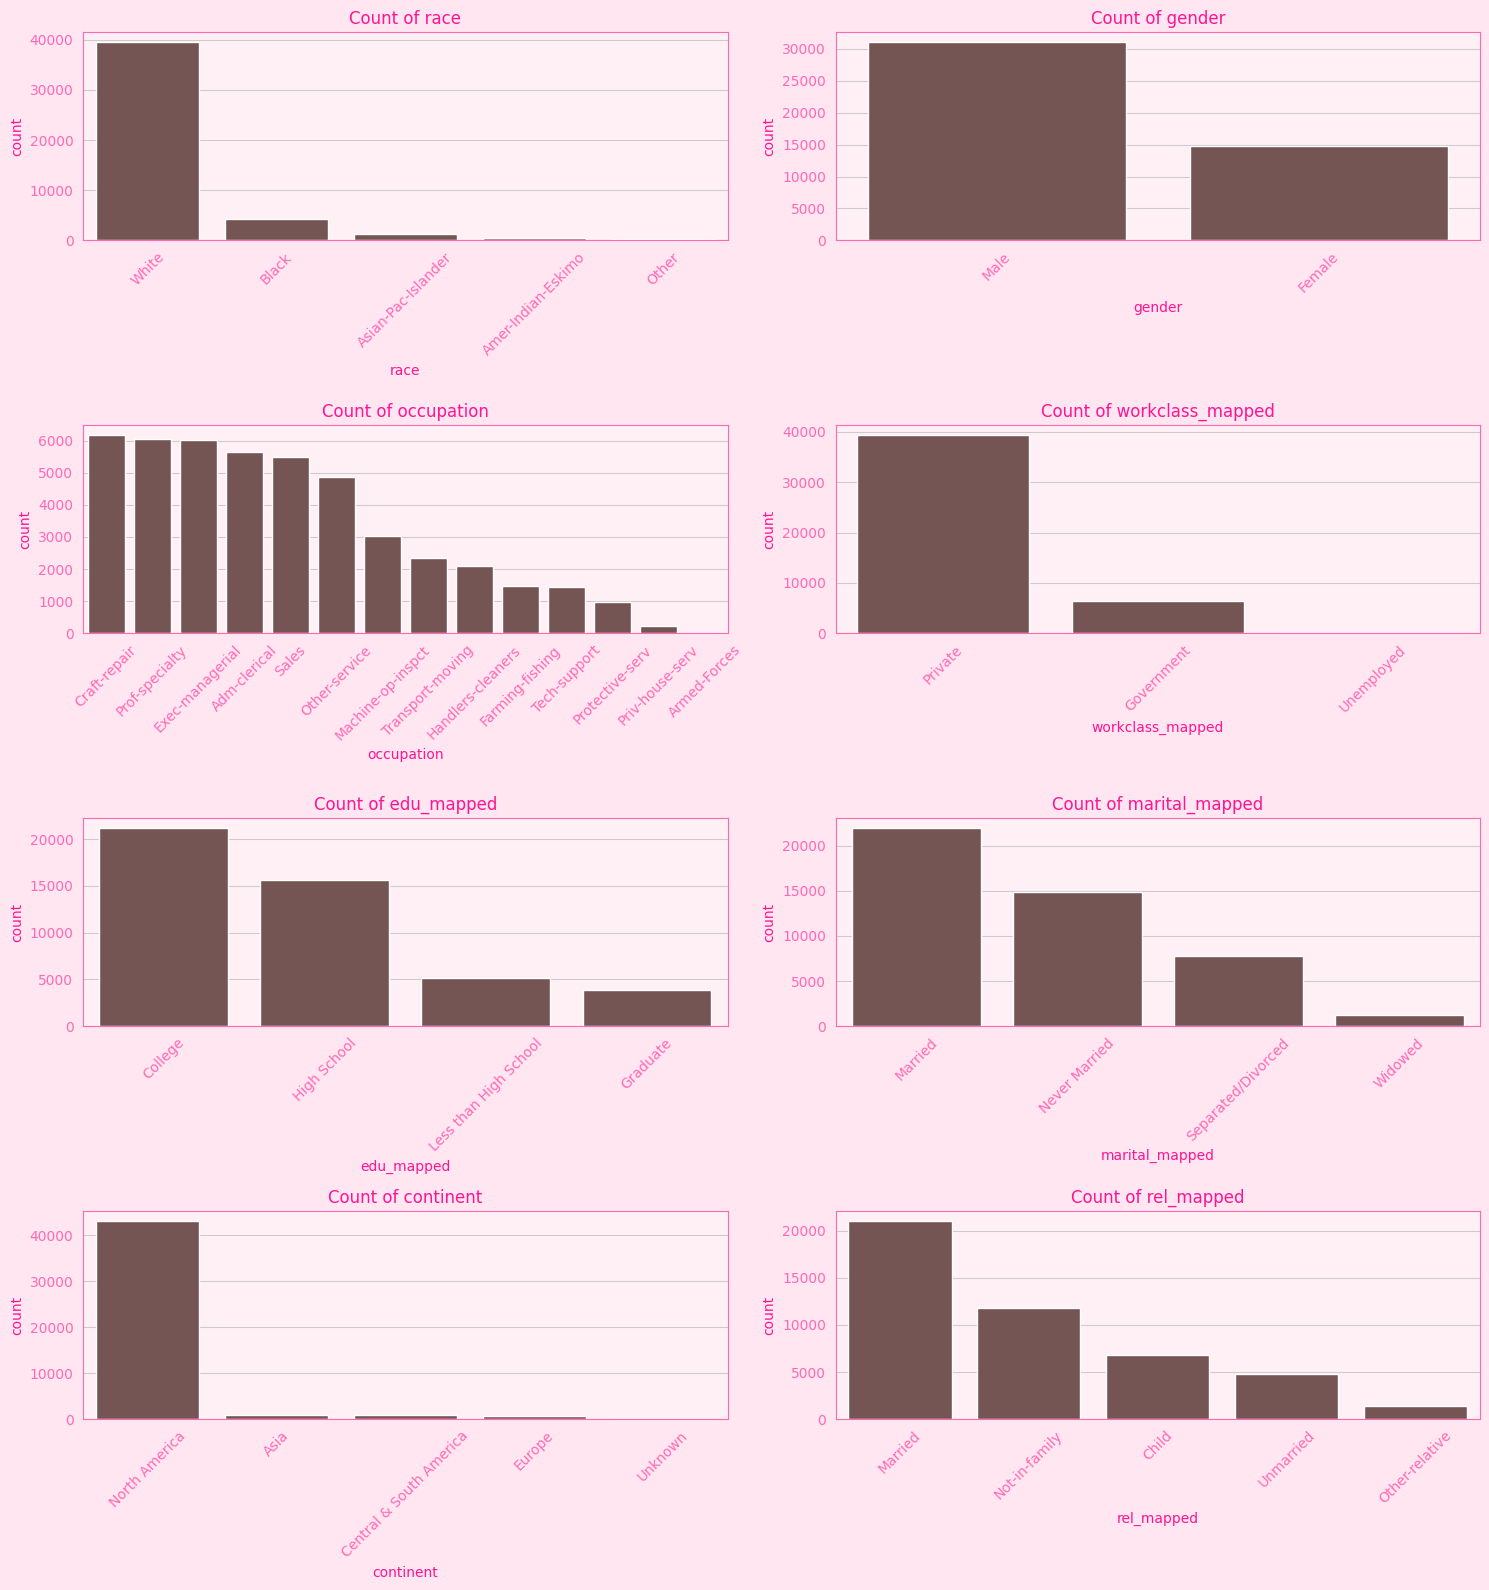

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['race', 'gender', 'occupation', 'workclass_mapped', 'edu_mapped', 'marital_mapped', 'continent', 'rel_mapped']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


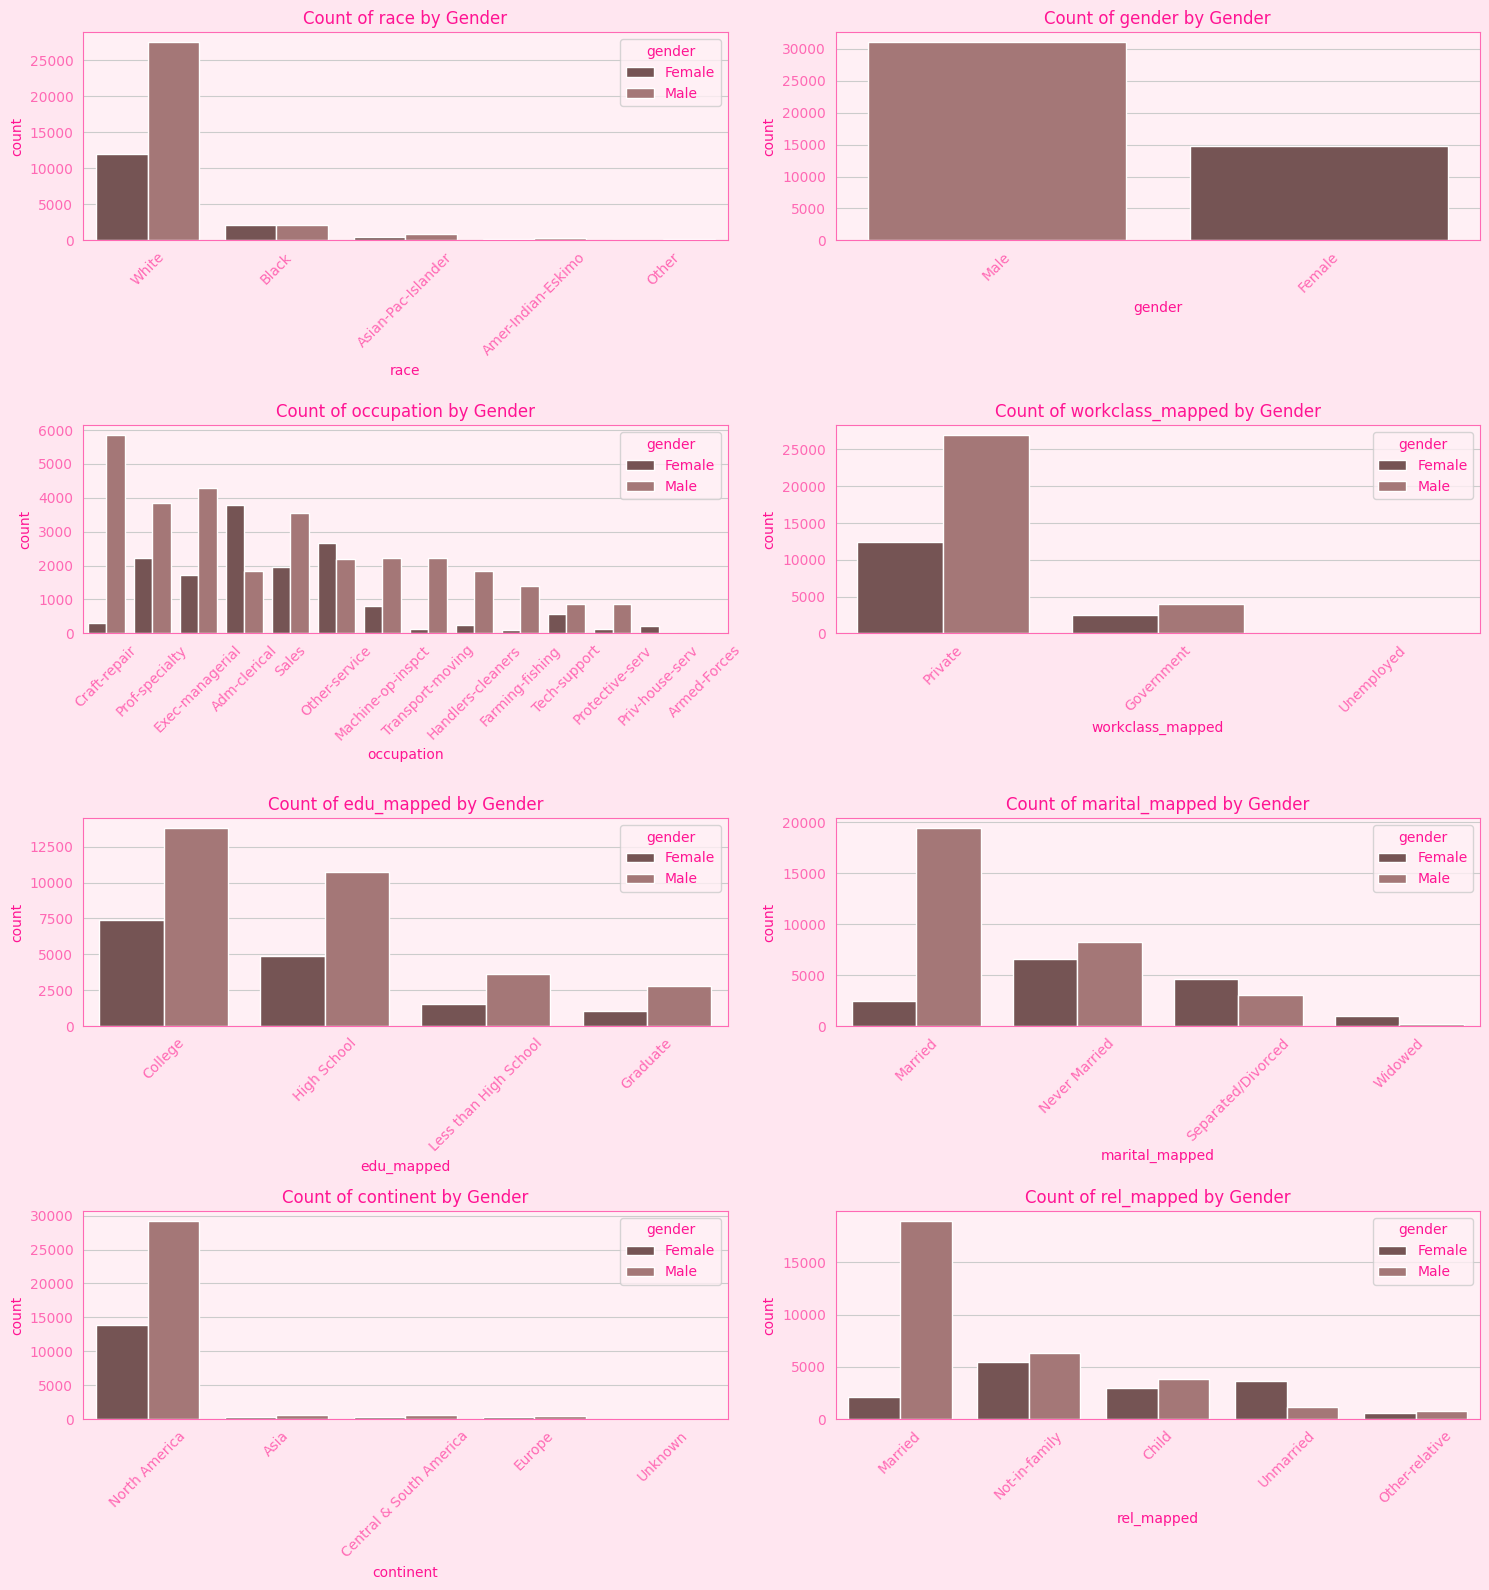

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['race', 'gender', 'occupation', 'workclass_mapped', 'edu_mapped', 'marital_mapped', 'continent', 'rel_mapped']

n = len(cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='gender', ax=axes[i],
                  order=df[col].value_counts().index)
    axes[i].set_title(f'Count of {col} by Gender')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


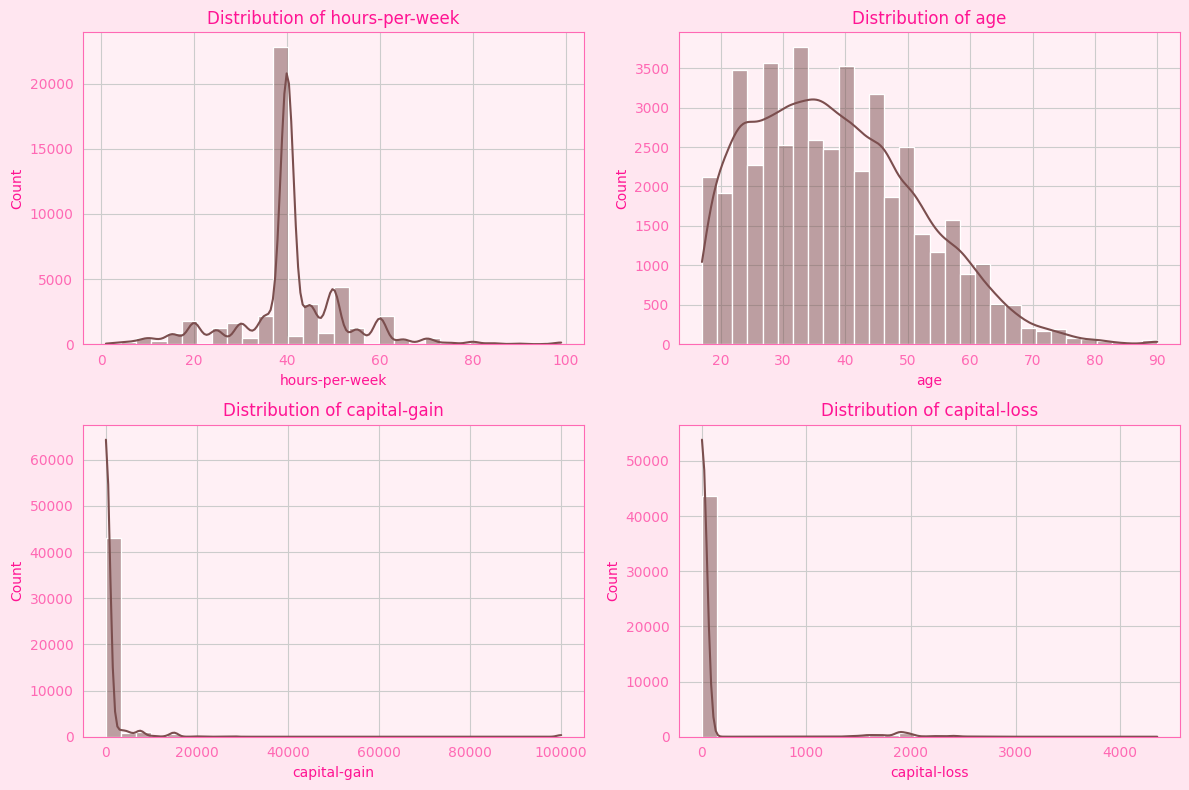

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 cols grid
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


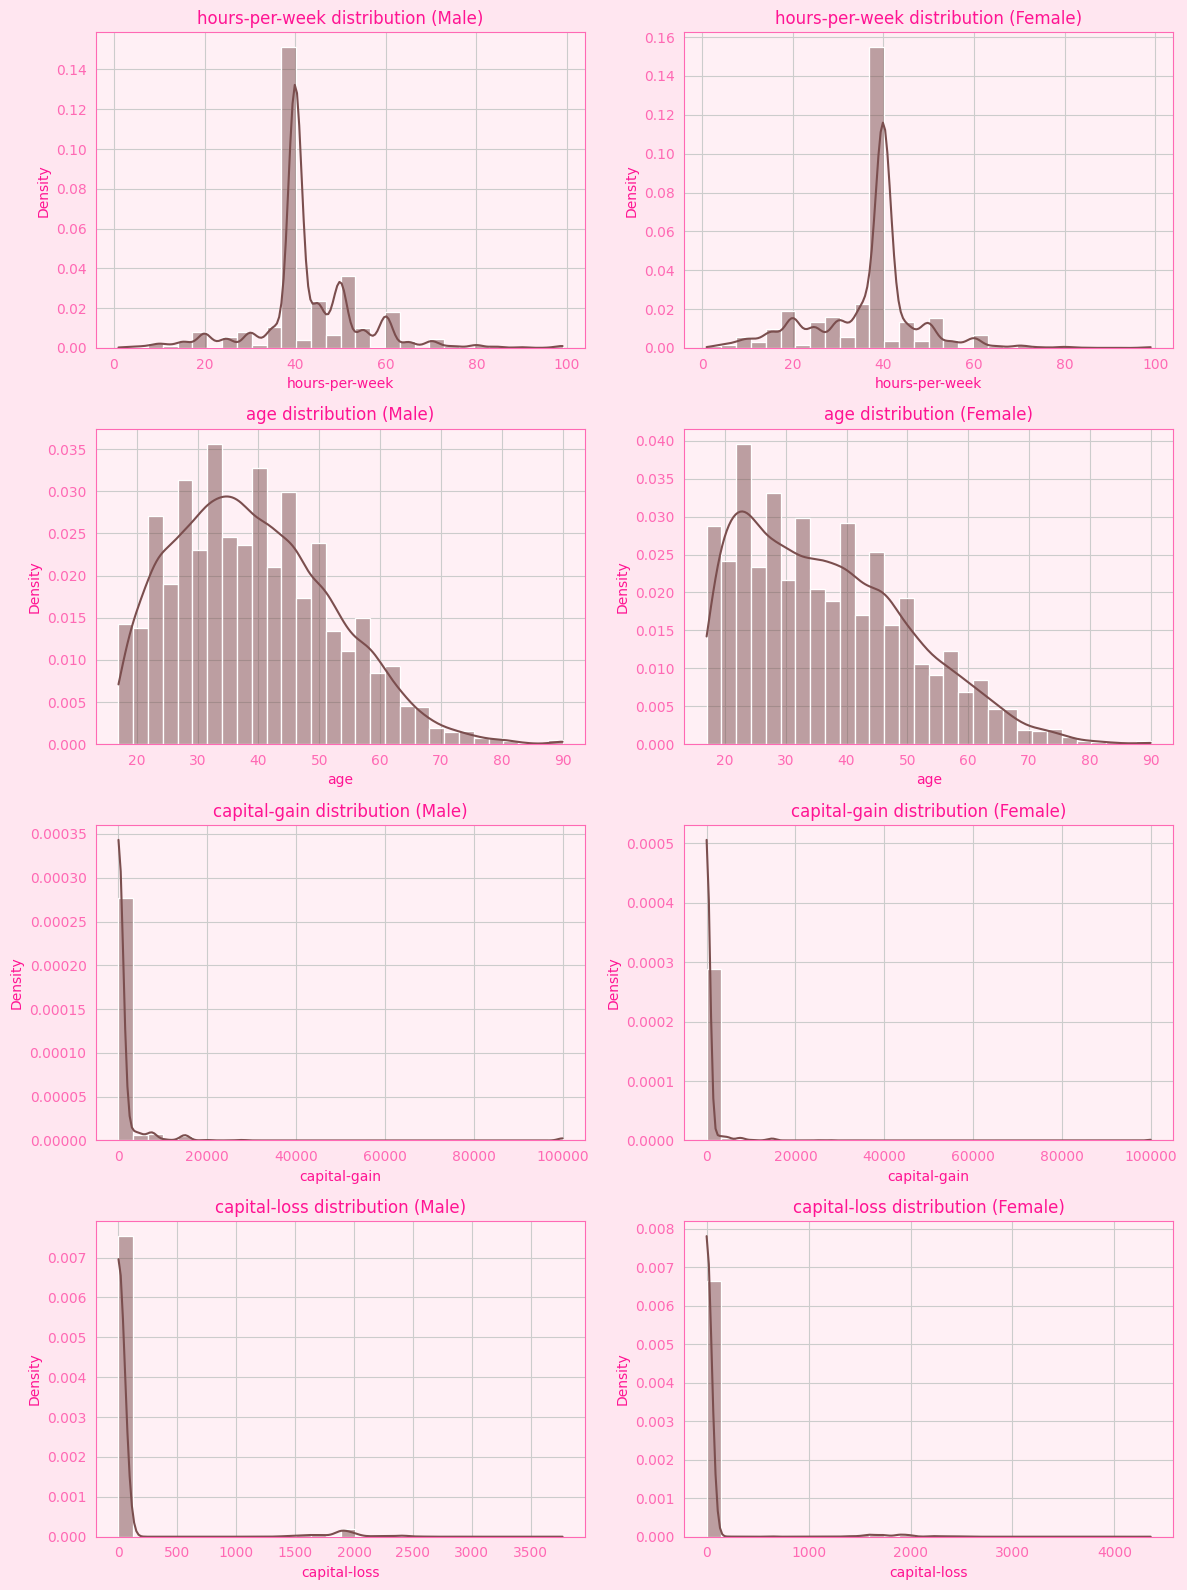

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))  # rows = features, cols=gender

for i, col in enumerate(num_cols):
    for j, gender in enumerate(['Male', 'Female']):
        subset = df[df['gender'] == gender]
        sns.histplot(
            data=subset,
            x=col,
            bins=30,
            kde=True,
            ax=axes[i, j],
            stat='density'
        )
        axes[i, j].set_title(f'{col} distribution ({gender})')

plt.tight_layout()
plt.show()


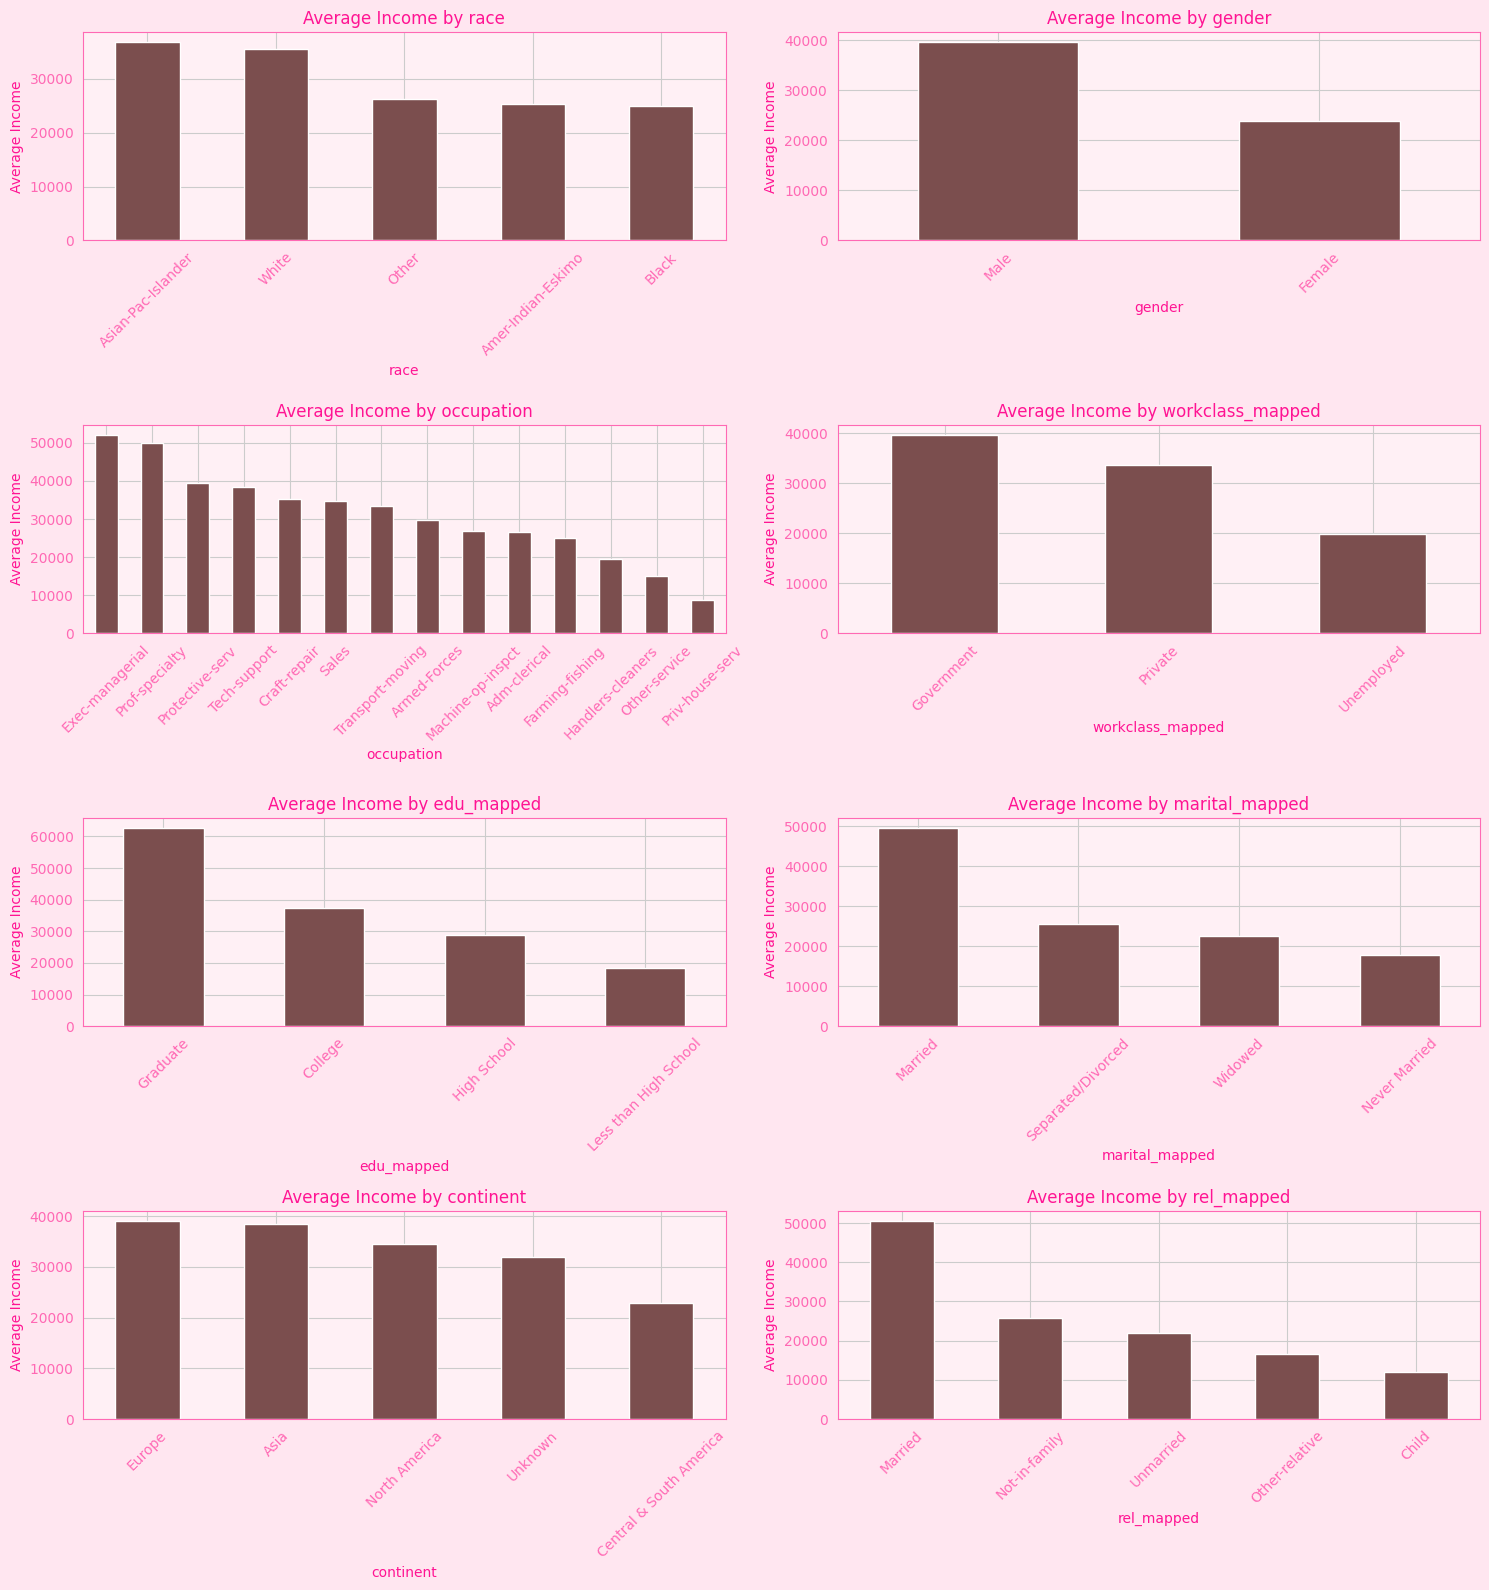

In [170]:
import matplotlib.pyplot as plt

cat_cols = ['race', 'gender', 'occupation', 'workclass_mapped', 'edu_mapped', 'marital_mapped', 'continent', 'rel_mapped']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(cat_cols):
    avg_income = df.groupby(col)['income'].mean().sort_values(ascending=False)
    avg_income.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average Income by {col}')
    axes[i].set_ylabel('Average Income')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots if total plots less than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-171-3ece7b4bbd48>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-171-3ece7b4bbd48>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-171-3ece7b4bbd48>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-171-3ece7b4bbd48>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-171-3ece7b4bbd48>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


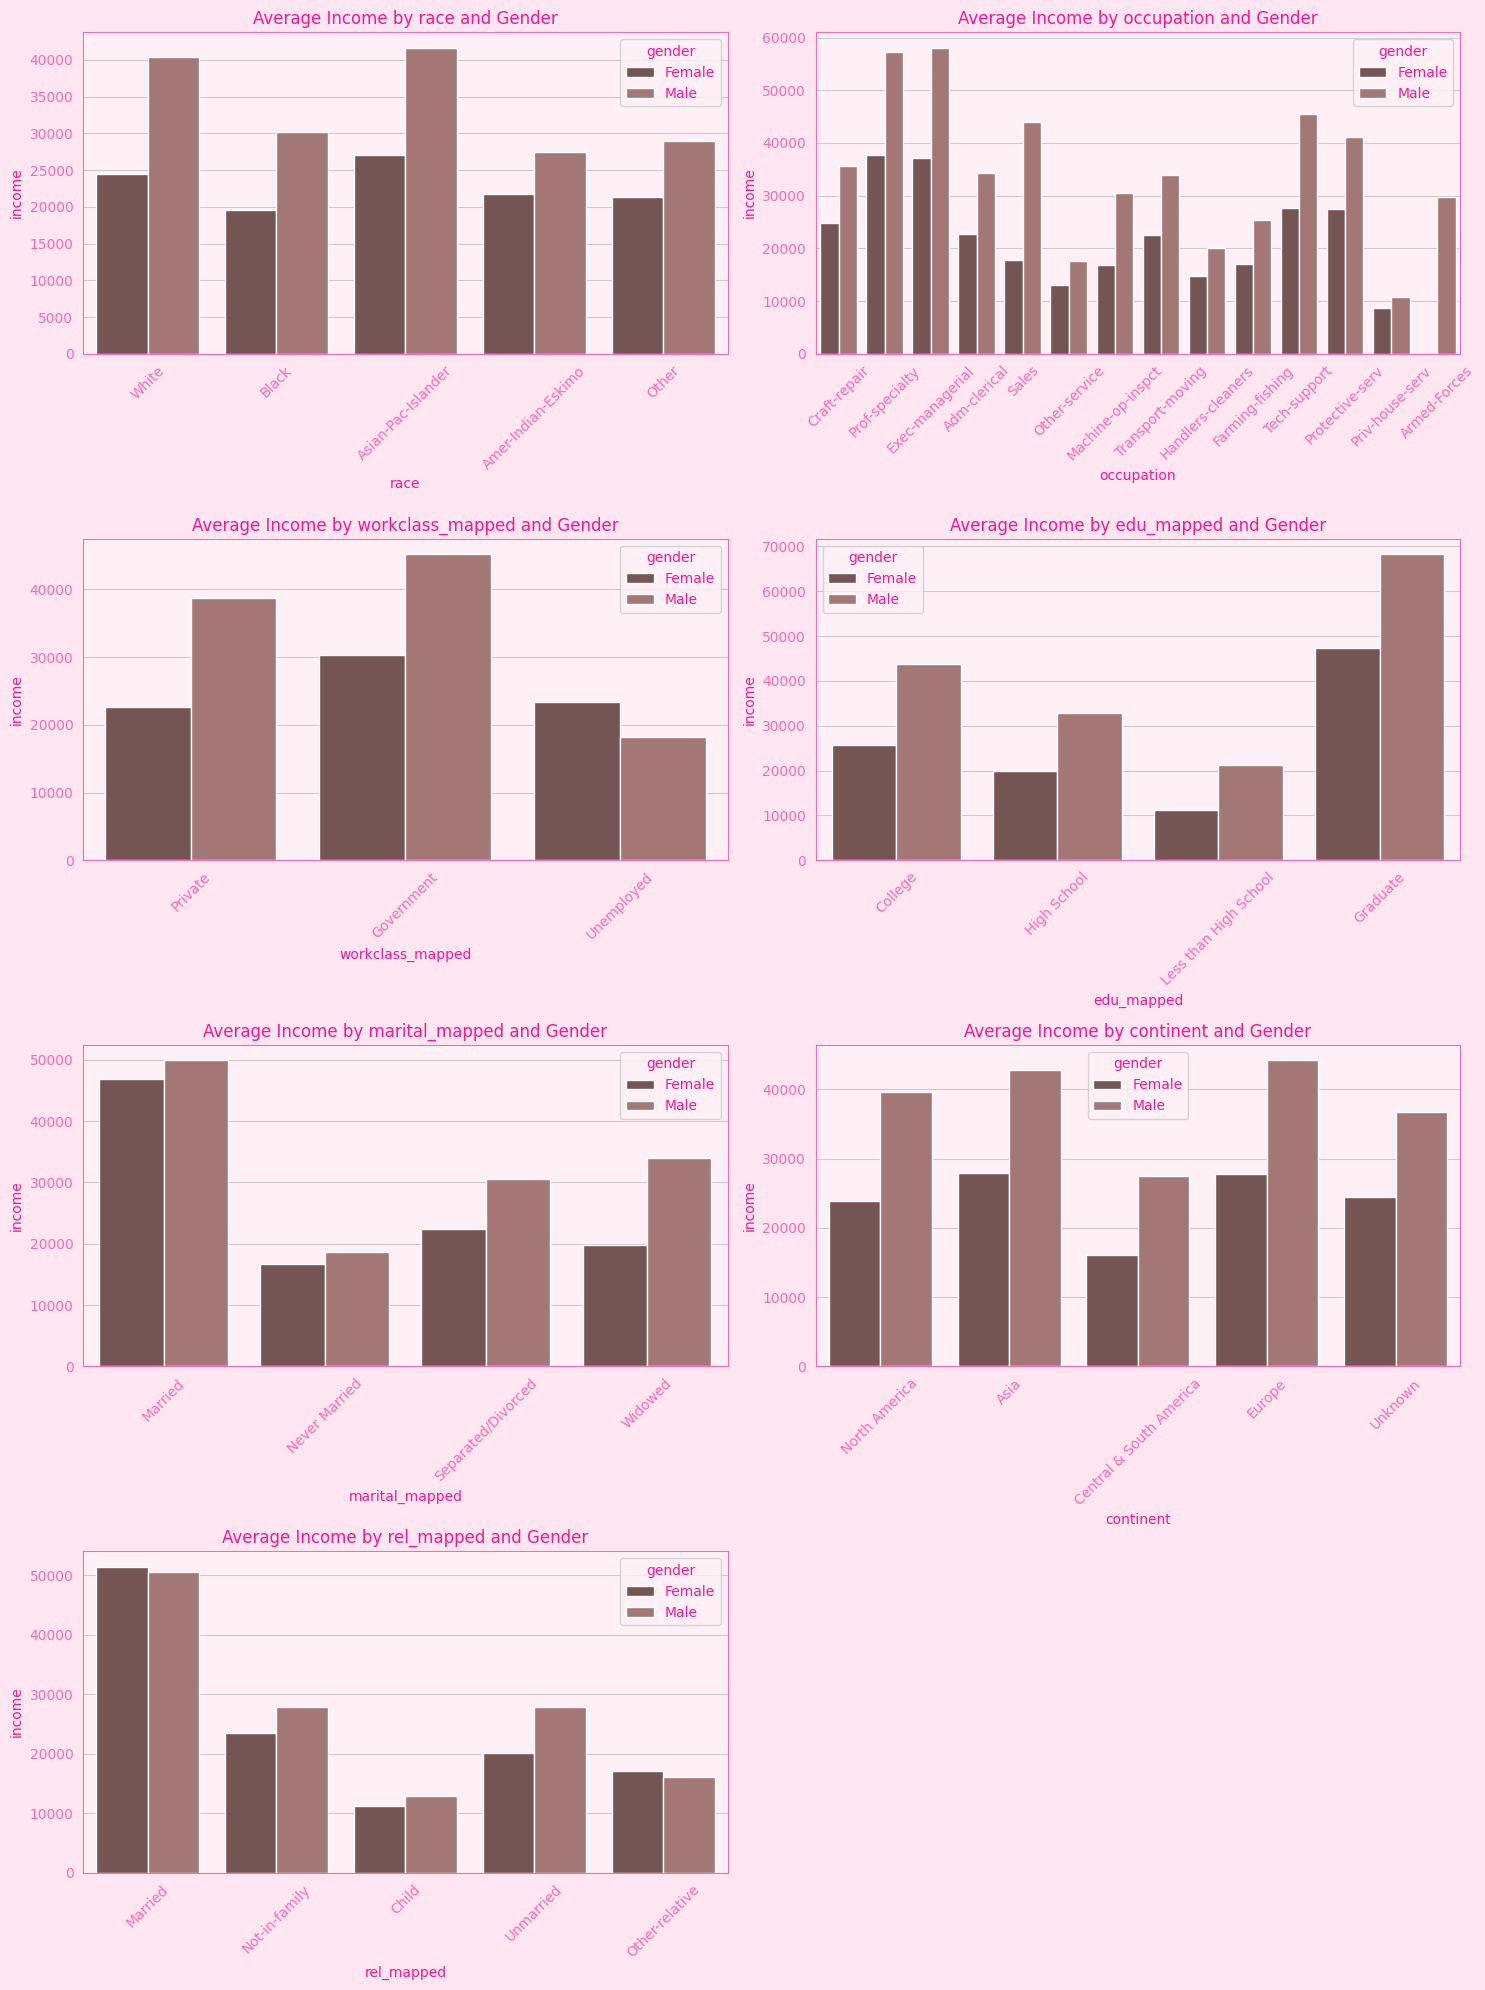

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['race', 'occupation', 'workclass_mapped', 'edu_mapped', 'marital_mapped', 'continent', 'rel_mapped']

n = len(cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # Calculate mean income by category and gender
    sns.barplot(
        data=df,
        x=col,
        y='income',
        hue='gender',
        ax=axes[i],
        ci=None,
        order=df[col].value_counts().index
    )
    axes[i].set_title(f'Average Income by {col} and Gender')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Splitting the data

In [162]:
from sklearn.model_selection import train_test_split

# For example, 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


### Normalization of numerical values (train and test separate)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss']

scaler.fit(train_df[num_cols])

train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])


In [164]:
train_df.head()

,hours-per-week,age,capital-gain,capital-loss,race,gender,income,occupation,workclass_mapped,edu_mapped,marital_mapped,continent,rel_mapped
20480,-0.074459,-0.865543,-0.145701,-0.217673,White,Male,12000,Craft-repair,Private,College,Never Married,North America,Child
13010,-0.911185,-1.243874,-0.145701,-0.217673,Black,Female,1700,Sales,Private,High School,Never Married,North America,Not-in-family
31191,2.017357,-0.033215,-0.145701,-0.217673,White,Male,27000,Machine-op-inspct,Private,Less than High School,Separated/Divorced,North America,Not-in-family
7069,-0.074459,-0.184548,-0.145701,-0.217673,White,Female,16830,Prof-specialty,Government,College,Separated/Divorced,North America,Unmarried
4867,-0.074459,-0.260214,-0.145701,-0.217673,Black,Female,15782,Other-service,Private,Less than High School,Separated/Divorced,North America,Unmarried
